# Вероятность в Python

> Вероятность — степень (относительная мера, количественная оценка) возможности наступления некоторого события. В теории вероятностей вероятность принимает значения от 0 до 1. Значение 1 соответствует достоверному событию, невозможное событие имеет вероятность 0. Чем выше значение, тем больше вероятность события

**Вероятность** как область научного знания важна, потому что неопределенность и случайность встречаются повсеместно, соответственно, знание о вероятности помогает принимать более информированные решения и осмыслять неопределенности. 


## Факториал

**Факториал** — функция, определённая на множестве неотрицательных целых чисел. Факториал натурального числа n определяется как произведение всех натуральных чисел от 1 до n включительно

Факториал вычисляется по следующей формуле:

$$ n! = n \times (n-1) \times (n-2)\times \ldots \times 2 \times 1 $$

Пример: 
$$ 5! = 5 \times 4 \times  3 \times 2 \times 1 = 120 $$

А как это выглядит в python

In [2]:
def factorial(n):
    if n == 1: return 1
    else: return n * factorial(n-1)

In [3]:
factorial(5)

120

Хорошо, но где факториалы используются в реальном мире? 

Скажем, в гонке участвуют пять машин F1, и вы хотите узнать количество способов, по которым эти пять могут финишировать первыми, вторыми или третьими. Можно взять листок бумаги и просто записать все возможные варианты, но зачем? Что если машин F1 больше 20? 

Вот как эта задача решается с помощью факториалов: 

$$ \frac{5!}{(5-3)!} = \frac{5!}{2!} = \frac{5 \times 4 \times  3 \times 2 \times 1}{2 \times 1} = 5 \times 4 \times 3 = 60 $$

Это называется перестановка

In [47]:
factorial(22)/factorial(22-3)

9240.0

## Перестановки



> В математике **перестановка** — это упорядочение членов набора в последовательность или, если последовательность уже определена, перестановка (изменение порядка) ее элементов. 


Существует два способа вычисления перестановок. Выбор способа зависит от того, разрешается повторение или нет. Давайте рассмотрим на примере.

У вас есть веб-сайт, на котором могут регистрироваться пользователи. Им нужно вводить пароль длиной строго в 8 символов, которые не должны повторяться. Сперва нужно определить, сколько букв и цифр в английском алфавите:

- количество букв: 26
- количество цифр: 10

То есть всего 36. Тогда `n = 36`, а `r = 8`, потому что пароль должен быть длиной в 8 символов. Зная это, мы легко можем рассчитать количество уникальных паролей, используя формулу: 


$$ \frac{n!}{(n-r)!} $$

Если вручную:

$$ \frac{36!}{(36-8)!} = 1220096908800 $$

In [5]:
def permutattion_without_repetition(n, r):
    return factorial(n)/factorial(n-r)

In [48]:
permutattion_without_repetition(36,8)

1220096908800.0

Здорово, но я хочу разрешить пользователям повторно использовать символы. Нет проблем, в данном случае это перестановки с повторениями, формула еще проще: 

$$ n^r $$

In [7]:
def permutattion_with_repetition(n, r):
    return n**r

In [8]:
permutattion_with_repetition(36, 8)

2821109907456

## Сочетания

> Сочетание— это выбор значений из набора, в котором (в отличие от перестановок) порядок выбора не имеет значения. 

Чтобы понять это определение, разберем следующий пример: **группа людей, выбранных в команду — это та же самая группа, независимо от порядка участников**. Вот и вся идея сочетаний. Если выбрать 5 членов команды, можно упорядочить их по имени, росту или другому параметру, но команда останется прежней — порядок не имеет значения. 

Давайте запишем это формулой. Количество сочетаний `C` набора из `n` объектов, взятых по `r`, рассчитывается так:

$$ C(n,r) = \frac{n!}{r!(n-r)!} $$

С этим уравнением мы можем решить следующую задачу: **сколькими способами можно выбрать в футбольную команду 5 человек из 10?** 

Группа будет той же, порядок значения не имеет. Значит, `n = 10`, а `r = 5`:

$$ C(n,r) = \frac{10!}{5!(10-5)!} = 252  $$


In [49]:
def combination_without_repetition(n, r):
    return factorial(n)/ (factorial(r) * factorial(n-r))

In [51]:
combination_without_repetition(10,5)

252.0

Великолепно! Но интересно, существует ли версия сочетаний с повторениями? Да! 

Представьте, что готовите сэндвич и по какой-то причине вам нужно использовать только 4 ингредиента из 10. Однако ингредиенты не должны быть уникальны, например, можно положить 3 куска сыра и 1 кусок салями. Как это здорово, я тоже обожаю сыр, вот спасибо!

Но как сформулировать эту идею математически? Ответ снова прост:

$$ \frac{(n+r-1)!}{r!(n-1)} $$

Давайте применим формулу к примеру выше. n снова равно 10 (потому что 10 возможных ингредиентов), а r = 4 (потому что выбрать можно только 4):

$$ \frac{(10+4-1)!}{4!(10-1)} = 715 $$

In [13]:
def combination_with_repetition(n, r):
    return factorial(n+r-1)/ (factorial(r) * factorial(n-1))

In [14]:
combination_with_repetition(10,4)

715.0

## Вероятность

Здесь я расскажу о том, что такое:
- пространство элементарных событий («sample space»)  
- случайных величин («outcome»);

Приведем понятие эксперимента и то, как я его понимаю; вероятность («probability»), интерпретация вероятности и дискретных случайных величин.



Пожалуй, одним из основополагающих понятий, благодаря которому можно понять, что речь идёт о теории вероятностей, а не о другой области исследования является **выборка («sample»)** (1) и **пространство элементарных событий («sample space»)** (2). Я воспринимаю (1) как некоторый список сущностей (или событий), которые может захватить глаз человека и представить его на бумаге. 

Есть второй вариант интерпретации определения (1) – это могут быть выдуманные значения (числа, символы), которые можно представить на бумаге. Эти данные являются исходными значениями для эксперимента (о нём будет сказано чуть позже). Выборку мы получаем из пространства элементарных событий (2). По сути своей это абстрактное понятие, определяющее множество выборок в пространстве.


Чуть выше мы затронули понятие эксперимента. Поскольку выше было определено, что выборка может быть, как выдуманной, так и нет, то соответственно, эксперимент я воспринимаю как некий процесс манипуляции либо с настоящими данными, либо с вымышленными. В качестве примера можно привести программный код на языке Python.

In [15]:
import random

data = []
while len(data) != 5:
    data.append(random.randint(1, 10))
print(data)

[2, 4, 6, 3, 2]


Данный пример определяет любое событие в пространстве элементарных событий. В нашем случае пространство элементарных событий – это случайное число в промежутке от 1 до 10 `(random.randint(1, 10))`, которое добавляет эти значения в список data, пока его длина `(len)` не будет равняться 5.

Ниже представлен пример с неслучайными данными. Давайте представим, что мы с вами работаем в некоторой фирме и для того, чтобы провести эксперимент, требуется узнать возраст людей (клиентов) по их имени. Вот код.

In [16]:
birth_date ={'Bob': 10, 'Alice':16, 'Ann':15}
print(birth_date)

{'Bob': 10, 'Alice': 16, 'Ann': 15}


Он представляет собой словарь, в качестве ключа выступает имя человека, а значения – его возраст.

> Представленное событие не является выдуманным (исходя из условия задачи), поскольку в первой задаче мы не знали какое число нам достанется для помещения его в список, а во втором значения данные заранее известны.


После того, как мы получили данные, необходимо их оценить. Оценка может быть либо экспериментальная (её ещё называют «грубой»), либо теоретической.  Логично понимать, что экспериментальная получена в результате проведения эксперимента, а теоретическая без проведения эксперимента.

В качестве примера можно привести всеми известную задачу подбрасывания кубика, у которого на каждой грани написаны цифры от 1 до 6. И нам необходимо определить вероятность выпадения числа на каждой грани.


Вот пример теоретического определения вероятности:

Допустим кубик подбрасывается бесконечное количество раз, тогда в теории вероятность выпадения каждого числа стремится к

$$ Pr = \frac{1}{6} = 0.17 $$

 Проблема в том, что на практике мы не можем подбрасывать кубик бесконечное количество раз. Это утомительно и не нужно, поэтому мы проводим реальный эксперимент с ограничениями.


Например, нам нужно подбросить кубик 10 раз. Для этого я написал функцию, которая носит название «кубик».

In [17]:
def kubik(n):
    """
    :param n: Количество подбрасываний
    :return:  Список слкучайных подюрасываний кубика
    """
    data = []
    while len(data) <n:
        data.append(random.randint(1,6))
    return data

Она при помощи метода `(random.randint(1,6))` определяет количество выпаданий случайной грани от 1 до 6. Результат случайного числа он описывает в переменную data. Если мы выполним 10 подбрасываний, то результатом будет являться список из этих значений. Значения в списке могут быть любыми.

In [57]:
kub_data = kubik(100)
print(kub_data)

[2, 4, 2, 5, 6, 6, 3, 3, 5, 6, 4, 4, 5, 4, 2, 5, 1, 1, 1, 1, 5, 3, 3, 3, 6, 5, 3, 4, 2, 6, 4, 5, 4, 1, 6, 4, 3, 2, 1, 4, 2, 4, 1, 3, 1, 1, 2, 1, 6, 3, 4, 1, 6, 3, 5, 1, 2, 1, 3, 5, 4, 1, 5, 2, 1, 4, 6, 6, 2, 3, 5, 1, 5, 3, 3, 4, 6, 6, 2, 6, 5, 4, 5, 6, 2, 5, 3, 1, 1, 3, 3, 6, 3, 2, 4, 5, 5, 1, 6, 1]


Чтобы получить вероятность выпадения каждой грани, необходимо определить количество граней в выборке. Я реализовал это при помощи следующей функции:

In [58]:
def count_rate(kub_data):
    """
    Возвращает частоту выпадания значений кубика,
    согласно полученным данным
    :param kub_data: данные эксперимента
    :return:
    """
    kub_rate = {}
    for i in kub_data:
        if i in kub_rate:
            continue
        else:
            kub_rate[i] = kub_data.count(i)
    for i in range(1, 7):
        if i not in kub_rate:
            kub_rate[i] = 0
    return kub_rate


In [59]:
rate = count_rate(kub_data)
print(rate)

{2: 13, 4: 16, 5: 17, 6: 16, 3: 18, 1: 20}


Результатом функции служит словарь, который считает количество выпадений от 1 до 6. Пример реализует два цикла, первый цикл считает текущие случайные значения в полученной выборке, но поскольку у нас некоторые значения могут не выпасть, то мы их добавляем в конец словаря.

Данные, конечно, я получил, но мне не нравится формат их вывода. Поэтому необходимо их отсортировать:

In [60]:
def sort_rate(counted_rate):
    """
    Возвращает отсортированную частоту по ключу
    :param counted_rate: Наша неотсортированная частота
    :return:
    """
    sorted_rate = {}
    for key in sorted(counted_rate.keys()):
        sorted_rate[key] = counted_rate[key]
    return sorted_rate

In [62]:
srt_rate = sort_rate(rate)
print(srt_rate)

{1: 20, 2: 13, 3: 18, 4: 16, 5: 17, 6: 16}


Для сортировки хорошо подойдёт метод sorted. В официальной документации написано, что она возвращает отсортированный список, полученный из итерируемого объекта, который передан как аргумент. В моём случае итерируемый объект – это наш словарь, который мы сортируем по ключу `(sorted(counted_rate.keys()))`.

Следующий шаг, преобразование данного словаря в `dataframe`. DataFrame представляет собой табличную структуру представления данных для удобного их структурирования. Для преобразования служит библиотека pandas (ссылка на официальную документацию (для тех, кто не знает): https://pandas.pydata.org/docs/ ). Она очень популярна в Python сообществе, имеет очень много интересных плюшек, о плюсах можно много говорить, об этом много написано в том числе на Хабре, поэтому перечислять их не буду. Вот реализация функции:

In [97]:
import pandas as pd

def crate_dataframe(sorted_date):
    """
    Создание и преобразование данных в Pandas dataframe
    :param sorted_date: dict
    :return: pd.Dataframe
    """
    df = pd.DataFrame(sorted_date, index=[0])
    df = df.T
    df = df.rename(columns={0: 'Частота'})
    df.insert(0, 'Количество выпаданий', range(1, 1 + len(df)))
    return df

In [98]:
df = crate_dataframe(srt_rate)

In [99]:
df

,Количество выпаданий,Частота
1,1,20
2,2,13
3,3,18
4,4,16
5,5,17
6,6,16


Теперь самое время определить вероятности. Для того, чтобы это сделать, нужно ещё раз убедиться, что мы подбрасывали кубик ровно 10 раз и затем полученное значение разделить на частоту. Ниже опишу общую формулу:


$$ \text{Вероятность(Pr)} =  \frac{\text{Количество подбрасований}}{\text{Частота выпадения грани куба}} $$

In [106]:
def probability_solving(dataframe):
    """
    Вычисление вероятности полученных результатов
    :param dataframe:
    :return:
    """
    sum_rate = dataframe['Частота'].sum()
    probability = []
    for i in dataframe['Частота']:
        probability.append(i / sum_rate)
    dataframe['Вероятность'] = probability
    return dataframe


In [107]:
df = probability_solving(df)

Суммарное количество бросков описывается переменной   sum_rate, для вычисления вероятности служит цикл, который берёт значения из столбца Частота (`dataframe['Частота']`) и вычисляет её вероятность, путём создания нового столбца (`dataframe['Вероятность']`).

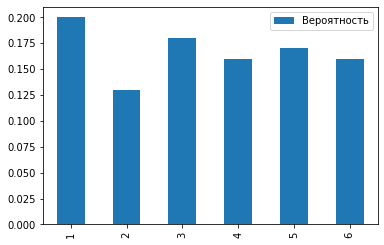

In [109]:
import matplotlib.pyplot as plt
a = df['Вероятность'].plot(kind='bar', legend=True)

# Домашнее задание 

1. Один самолет вылетел из Москвы, и должен совершить посадку в 5 городах. Необходимо узнать, количество городов, в котрых может приземлиться в первый, второй, третий город.

In [ ]:
# Начните писать код тут 

2. Осьминог Пауль 16 раз пробовал угадать победителя футбольного матча. 14 раз он угадал правильно, 2 раза ошибся. Проверьте гипотезу H0: Пауль выбирает победителя футбольного матча случайно. Сделайте вывод. (сложная задача)

In [ ]:
# Начните писать код тут 